In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 426.5, 323.5, -0.5)

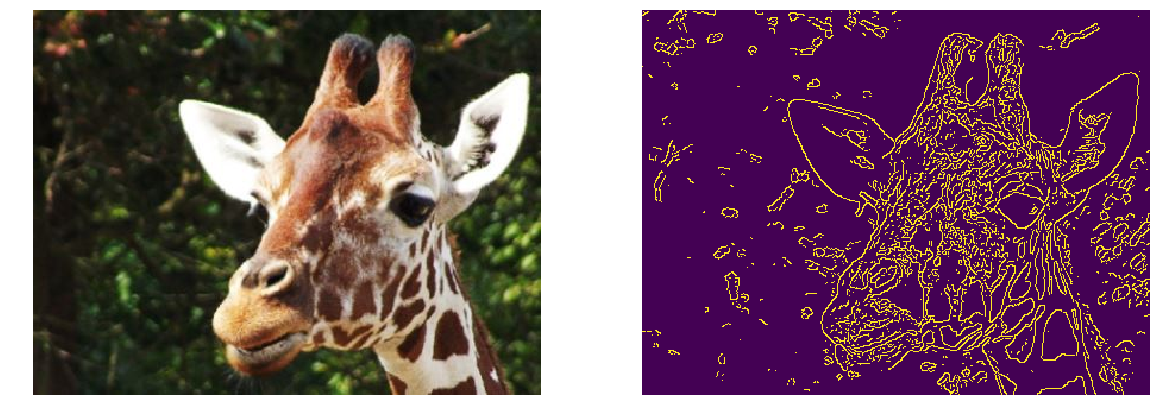

In [2]:
img = cv2.imread('giraffe.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Canny detection without blurring
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(edges)
plt.axis('off')

In [3]:
# Set the lower and upper threshold
med_val = np.median(img)
lower = int(max(0, .7*med_val))
upper = int(min(255, 1.3*med_val))

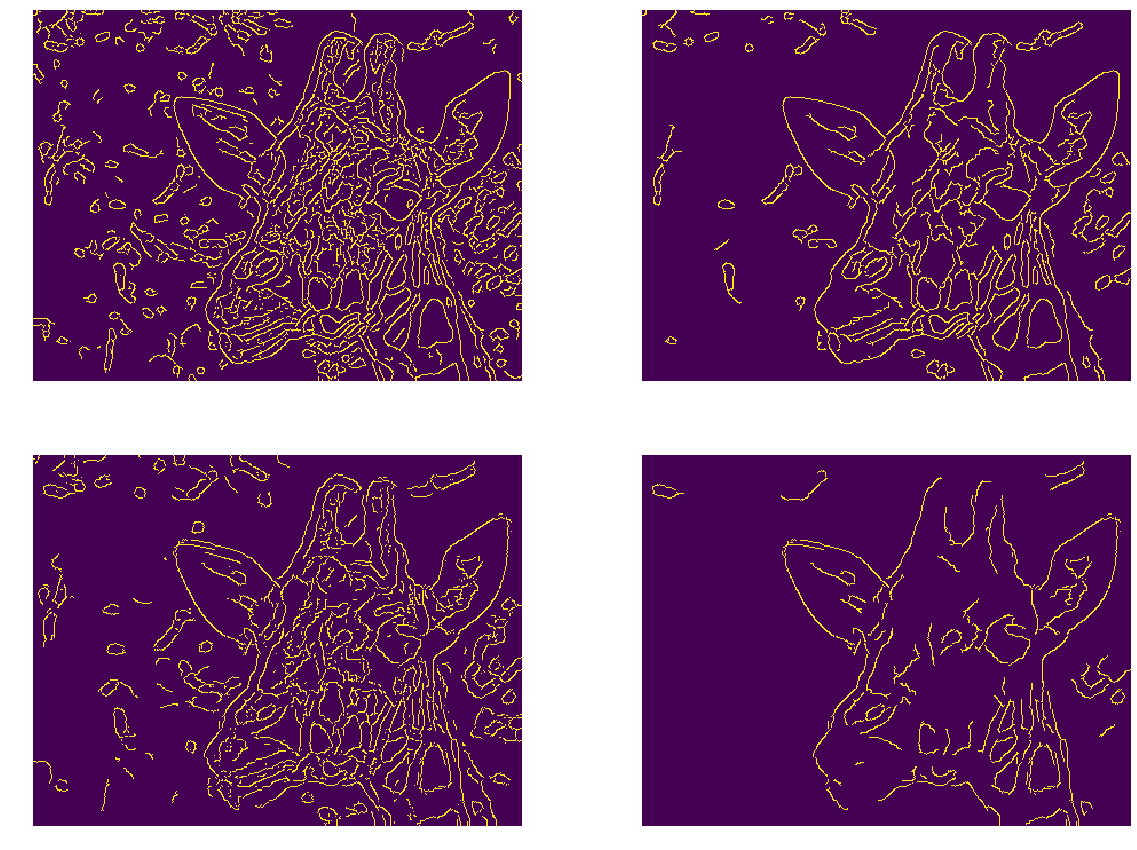

In [4]:
# Blurring with ksize = 5 
img_k5 = cv2.blur(img, ksize = (5, 5))
# Canny detection with different thresholds
edges_k5 = cv2.Canny(img_k5, threshold1 = lower, threshold2 = upper)
edges_k5_2 = cv2.Canny(img_k5, lower, upper+100)
# Blurring with ksize = 9 
img_k9 = cv2.blur(img, ksize = (9, 9))
# Canny detection with different thresholds
edges_k9 = cv2.Canny(img_k9, lower, upper)
edges_k9_2 = cv2.Canny(img_k9, lower, upper+100)
# Plot the images
images = [edges_k5, edges_k5_2, edges_k9, edges_k9_2]
plt.figure(figsize = (20, 15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [5]:
img = cv2.imread('desk.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Apply Harris corner detection
dst = cv2.cornerHarris(img_gray, blockSize = 2, ksize = 3, k = .04)

(-0.5, 330.5, 219.5, -0.5)

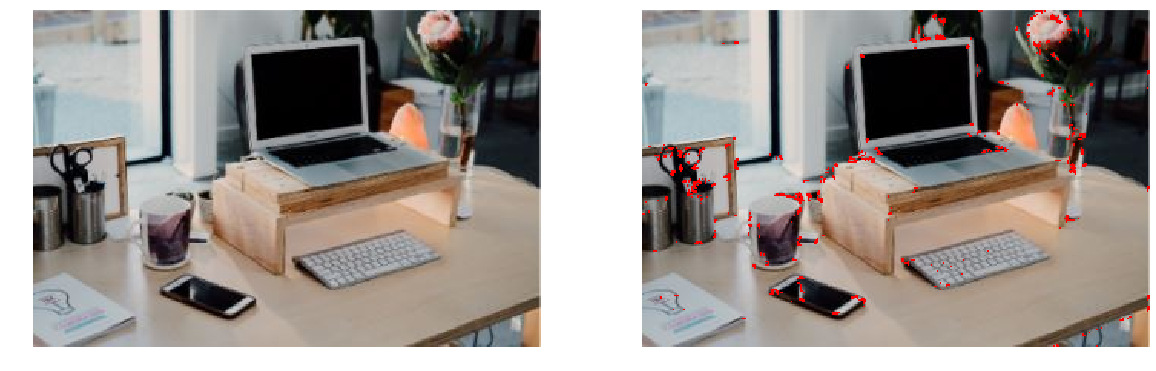

In [6]:
# Spot the detected corners
img_2 = img.copy()
img_2[dst>0.01*dst.max()]=[255,0,0]
# Plot the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

(-0.5, 330.5, 219.5, -0.5)

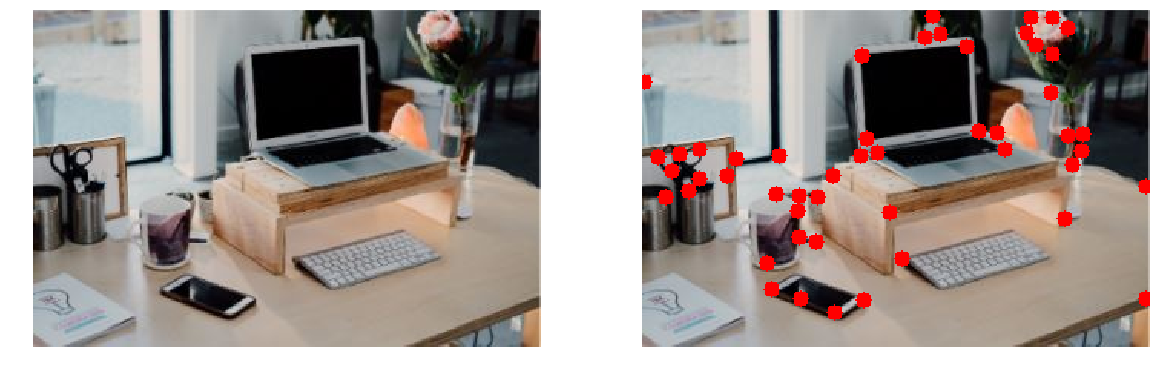

In [7]:
# Apply Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(img_gray, maxCorners = 50, 
                                  qualityLevel = 0.01, 
                                  minDistance = 10)
corners = np.int0(corners)
# Spot the detected corners
img_2 = img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(img_2, center = (x, y), 
               radius = 5, color = 255, thickness = -1)
# Plot the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

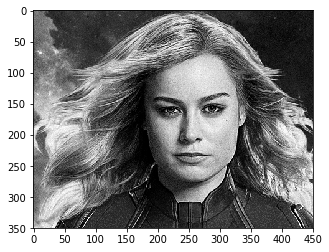

In [8]:
cap_mavl = cv2.imread('captin_marvel.png')
# Find the region of interest
roi = cap_mavl[200:550, 200:650]
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
plt.imshow(roi, cmap = 'gray')

In [9]:
# Load Cascade filter 
#face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

(-0.5, 449.5, 349.5, -0.5)

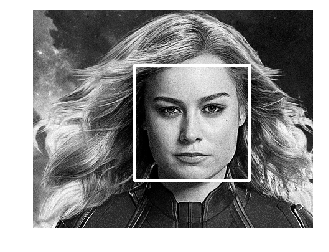

In [10]:
# Create the face detecting function 
def detect_face(img):
    
    img_2 = img.copy()
#   face_rects = face_cascade.detectMultiScale(img_copy    
    face_rects = face_cascade.detectMultiScale(img_2, 
                                               scaleFactor = 1.1,
                                               minNeighbors = 3)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_2, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_2
# Detect the face
roi_detected = detect_face(roi)
plt.imshow(roi_detected, cmap = 'gray')
plt.axis('off')

(-0.5, 749.5, 499.5, -0.5)

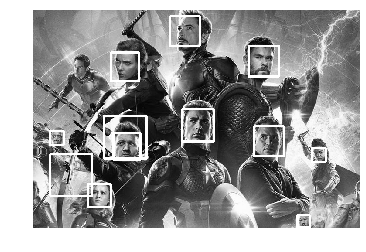

In [11]:
# Load the image file and convert the color mode
avengers = cv2.imread('avengers.jpg')
avengers = cv2.cvtColor(avengers, cv2.COLOR_BGR2GRAY)
# Detect the face and plot the result
detected_avengers = detect_face(avengers)
#display(detected_avengers, cmap = 'gray')
plt.imshow(detected_avengers, cmap = 'gray')
plt.axis('off')

In [13]:
# Step 1. Define detect function
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def detect_face(img):
    
    img_copy = img.copy()
    face_rects = face_cascade.detectMultiScale(img_copy)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_copy

# Step 2. Call the cam
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()